<a href="https://colab.research.google.com/github/whistle-boy/TIL/blob/master/%EC%84%A0%ED%98%95%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선형 모델(Linear Models)

* 선형 모델은 과거 부터 지금 까지 널리 사용되고 연구 되고 있는 기계학습 방법
* 선형 모델은 입력 데이터에 대한 선형 함수를 만들어 예측 수행

* 회귀 분석을 위한 선형 모델은 다음과 같이 정의

\begin{equation}
\hat{y}(w,x) = w_0 + w_1 x_1 + ... + w_p x_p
\end{equation}

  + $x$: 입력 데이터
  + $w$: 모델이 학습할 파라미터
  + $w_0$: 편향
  + $w_1$~$w_p$: 가중치


## 선형 회귀(Linear Regression)

* **선형 회귀(Linear Regression)**또는 **최소제곱법(Ordinary Least Squares)**은 가장 간단한 회귀 분석을 위한 선형 모델
* 선형 회귀는 모델의 예측과 정답 사이의 **평균제곱오차(Mean Squared Error)**를 최소화 하는 학습 파라미터 $w$를 찾음
* 평균제곱오차는 아래와 같이 정의

\begin{equation}
MSE = \frac{1}{N} \sum_{i=1}^{N}(y_i - \hat{y}_i)^2
\end{equation}

  + $y$: 정답
  + $\hat{y}$: 예측 값을 의미

* 선형 회귀 모델에서 사용하는 다양한 오류 측정 방법
  + MAE(Mean Absoulte Error)
  + MAPE(Mean Absolute Percentage Error)
  + MSE(Mean Squared Error)
  + MPE(Mean Percentage Error)

In [16]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

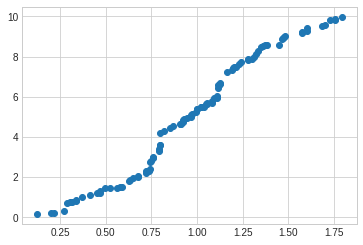

In [18]:
noise = np.random.rand(100, 1)
X = sorted(np.random.rand(100, 1) + noise)
y = sorted(10 * np.random.rand(100))


plt.scatter(X, y)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
print(f'선형 회귀 가중치: {model.coef_}')
print(f'선형 회귀 편향: {model.intercept_}')

선형 회귀 가중치: [7.16445089]
선형 회귀 편향: -1.8934112711744477


In [21]:
print(f'학습 데이터 점수: {model.score(X_train, y_train)}')
print(f'평가 데이터 점수: {model.score(X_test, y_test)}')

학습 데이터 점수: 0.9691175776909359
평가 데이터 점수: 0.9496824647080253


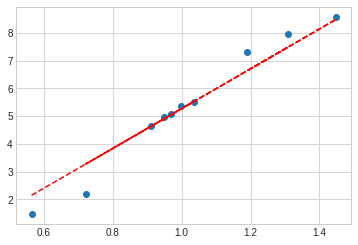

In [22]:
predict = model.predict(X_test)

plt.scatter(X_test, y_test)
plt.plot(X_test, predict, '--r')

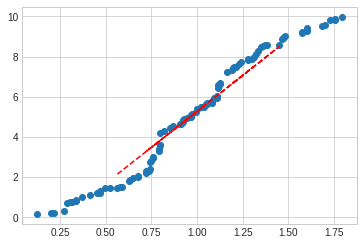

In [23]:
plt.scatter(X, y)
plt.plot(X_test, predict, '--r')

### 보스턴 주택 가격 데이터

* 주택 가격 데이터는 도시에 대한 분석과 부동산, 경제적인 정보 분석 등 많은 활용 가능한 측면들이 존재
* 보스턴 주택 가격 데이터는 카네기 멜론 대학교에서 관리하는 StatLib 라이브러리에서 가져온 것
* 헤리슨(Harrison, D.)과 루빈펠트(Rubinfeld, D. L.)의 논문 "Hedonic prices and the demand for clean air', J. Environ. Economics & Management"에서 보스턴 데이터가 사용
* 1970년도 인구 조사에서 보스턴의 506개 조사 구역과 주택 가격에 영향을 주는 속성 21개로 구성

| 속성 | 설명 |
|------|------|
| CRIM | 자치시(town)별 1인당 범죄율 |
| ZN | 25,000 평방 피트가 넘는 거주지역 토지 비율 |
| INDUS | 자치시(town)별 비소매 상업지역 토지 비율 |
| CHAS | 찰스 강(Charles River)에 대한 변수 (강의 경계에 위치하면 1, 그렇지 않으면 0) |
| NOX | 10,000,000당  일산화질소 농도 |
| RM | 주택 1가구당 평균 방의 수 |
| AGE | 1940년 이전에 건축된 소유주택 비율 |
| DIS | 5개의 보스턴 고용 센터까지의 가중 거리 |
| RAD | 방사형 고속도로 접근성 지수 |
| TAX | 10,000 달러당 재산 세율 |
| PTRATIO | 자치시(town)별 학생/교사 비율 |
| B | 1000(Bk-0.63)^2, Bk: 자치시별 흑인 비율 |
| LSTAT | 모집단의 하위계층 비율(%) |
| MEDV | 소유자가 거주하는 주택가격(중앙값) (단위: 1,000 달러) |

In [24]:
from sklearn.datasets import load_boston

boston = load_boston()
print(boston.keys())
print(boston.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highway

In [25]:
import pandas as pd

boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['MEDV'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [26]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


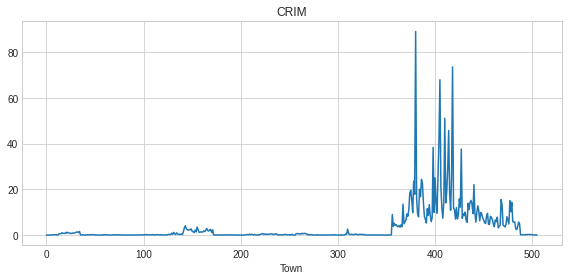

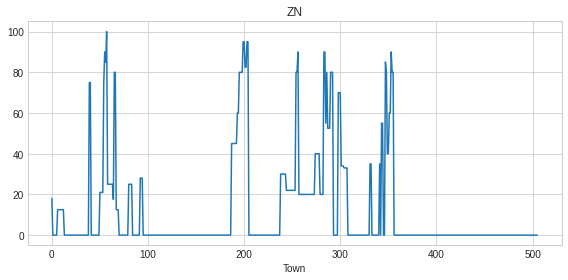

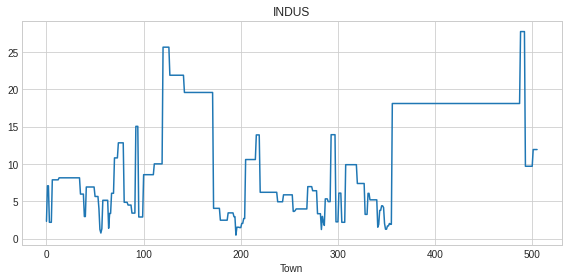

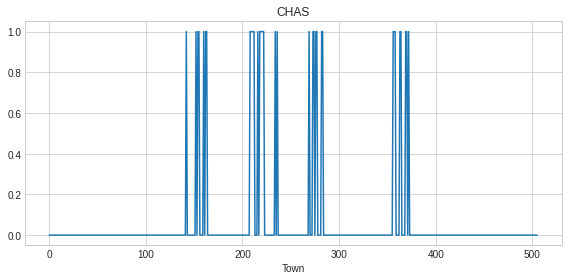

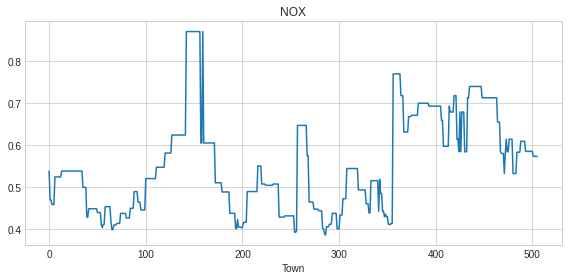

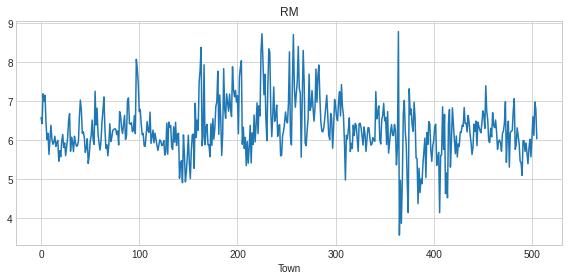

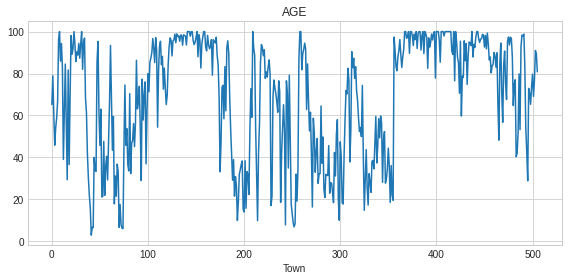

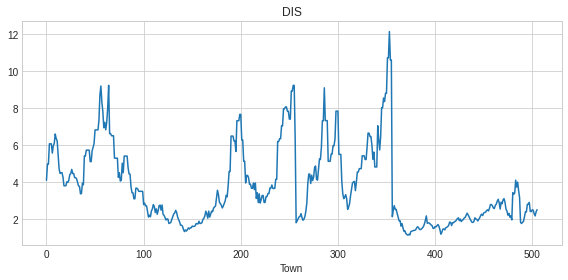

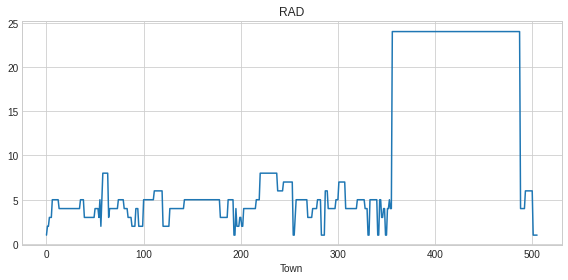

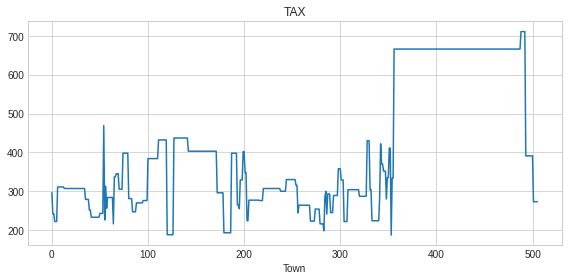

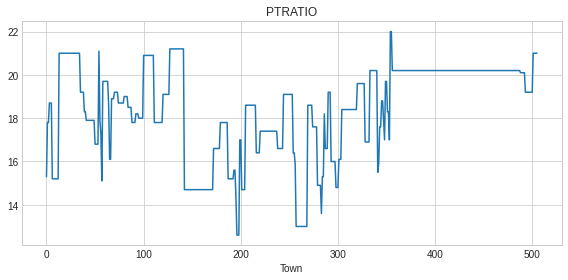

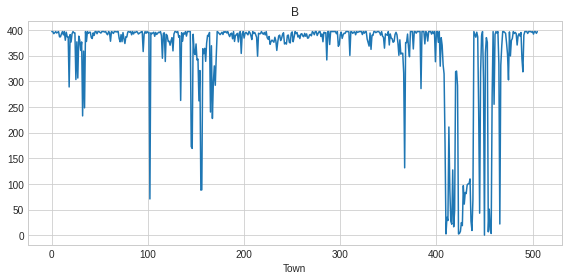

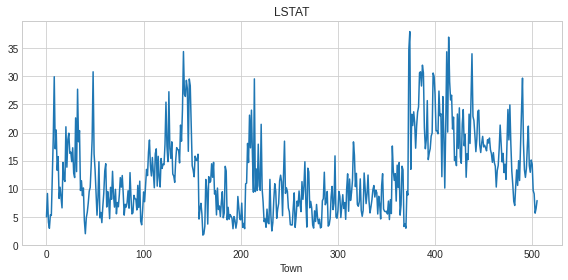

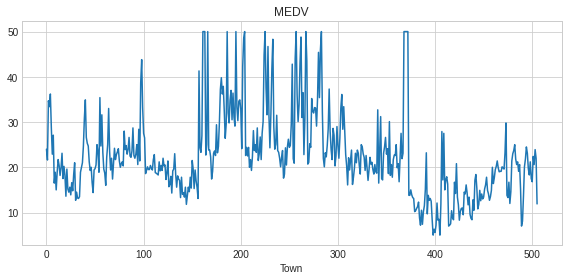

In [27]:
for i, col in enumerate(boston_df.columns):
    plt.figure(figsize=(8,4))
    plt.plot(boston_df[col])
    plt.title(col)
    plt.xlabel('Town')
    plt.tight_layout()

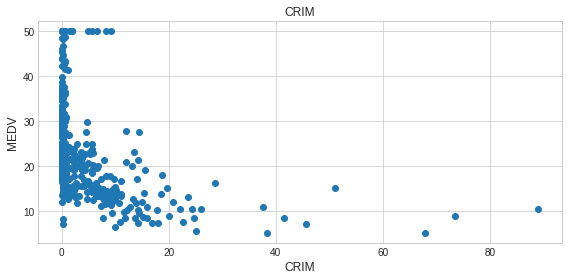

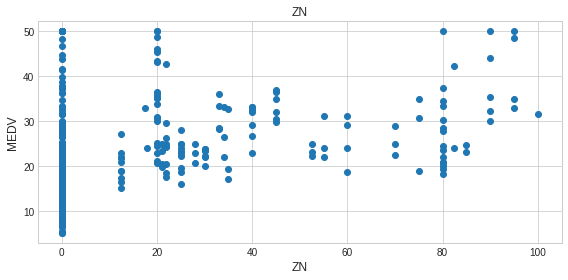

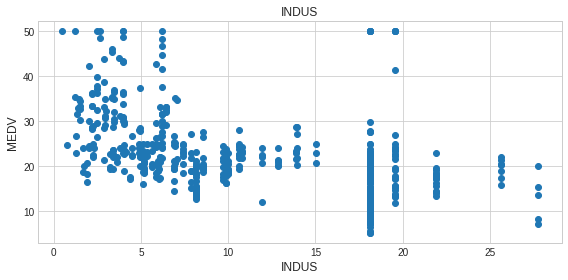

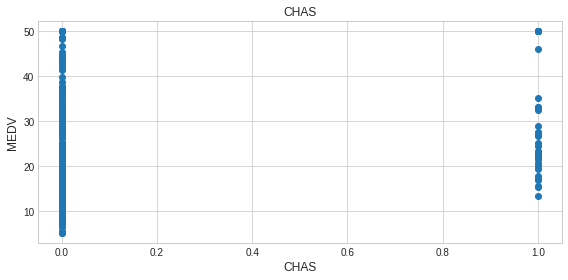

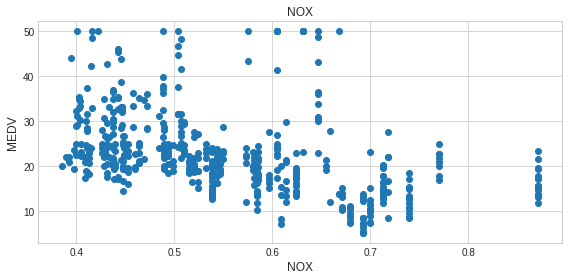

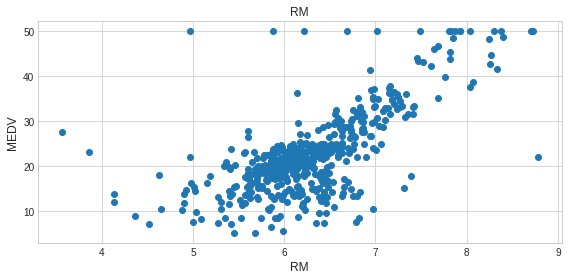

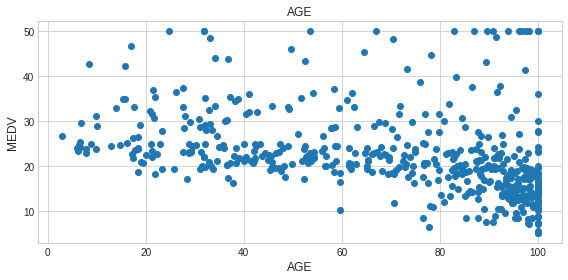

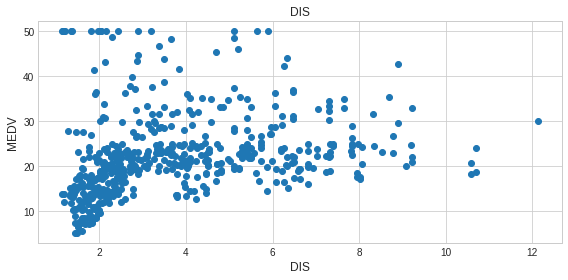

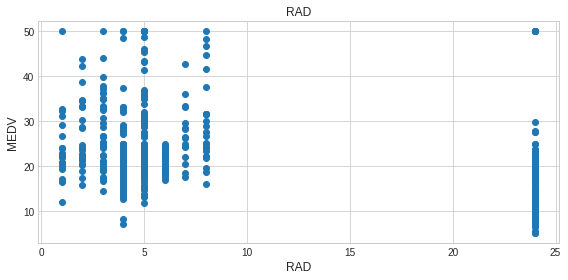

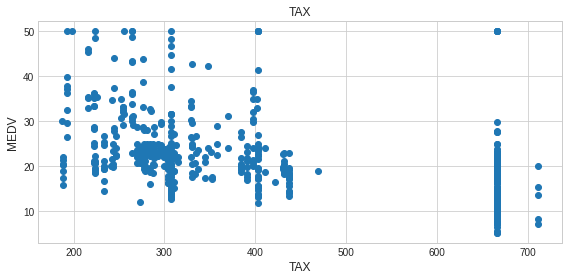

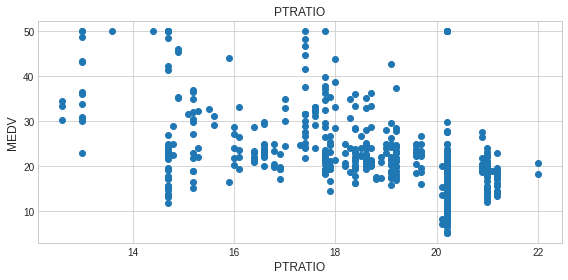

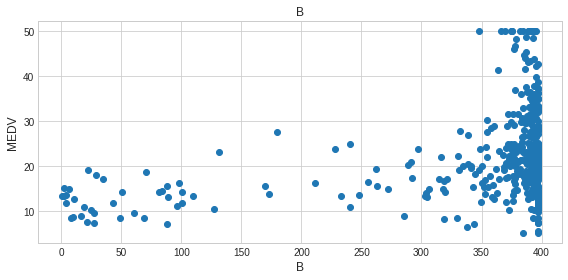

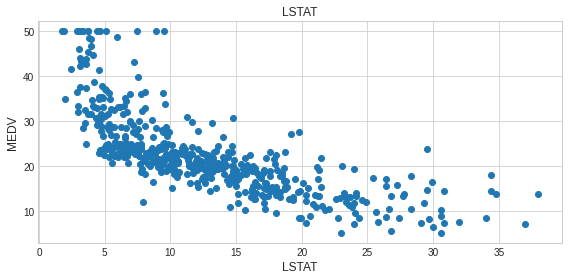

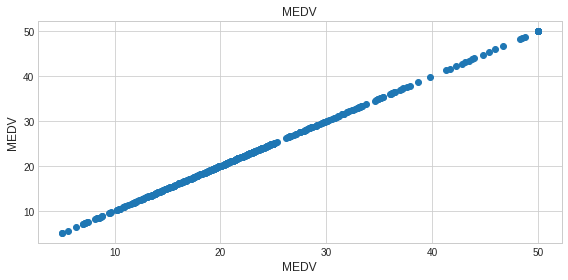

In [28]:
# target과 상관성을 확인하여 pattern 체크
for i, col in enumerate(boston_df.columns):
    plt.figure(figsize=(8,4))
    plt.scatter(boston_df[col], boston_df['MEDV'])
    plt.title(col)
    plt.ylabel('MEDV', size=12)
    plt.xlabel(col, size=12)
    plt.tight_layout()

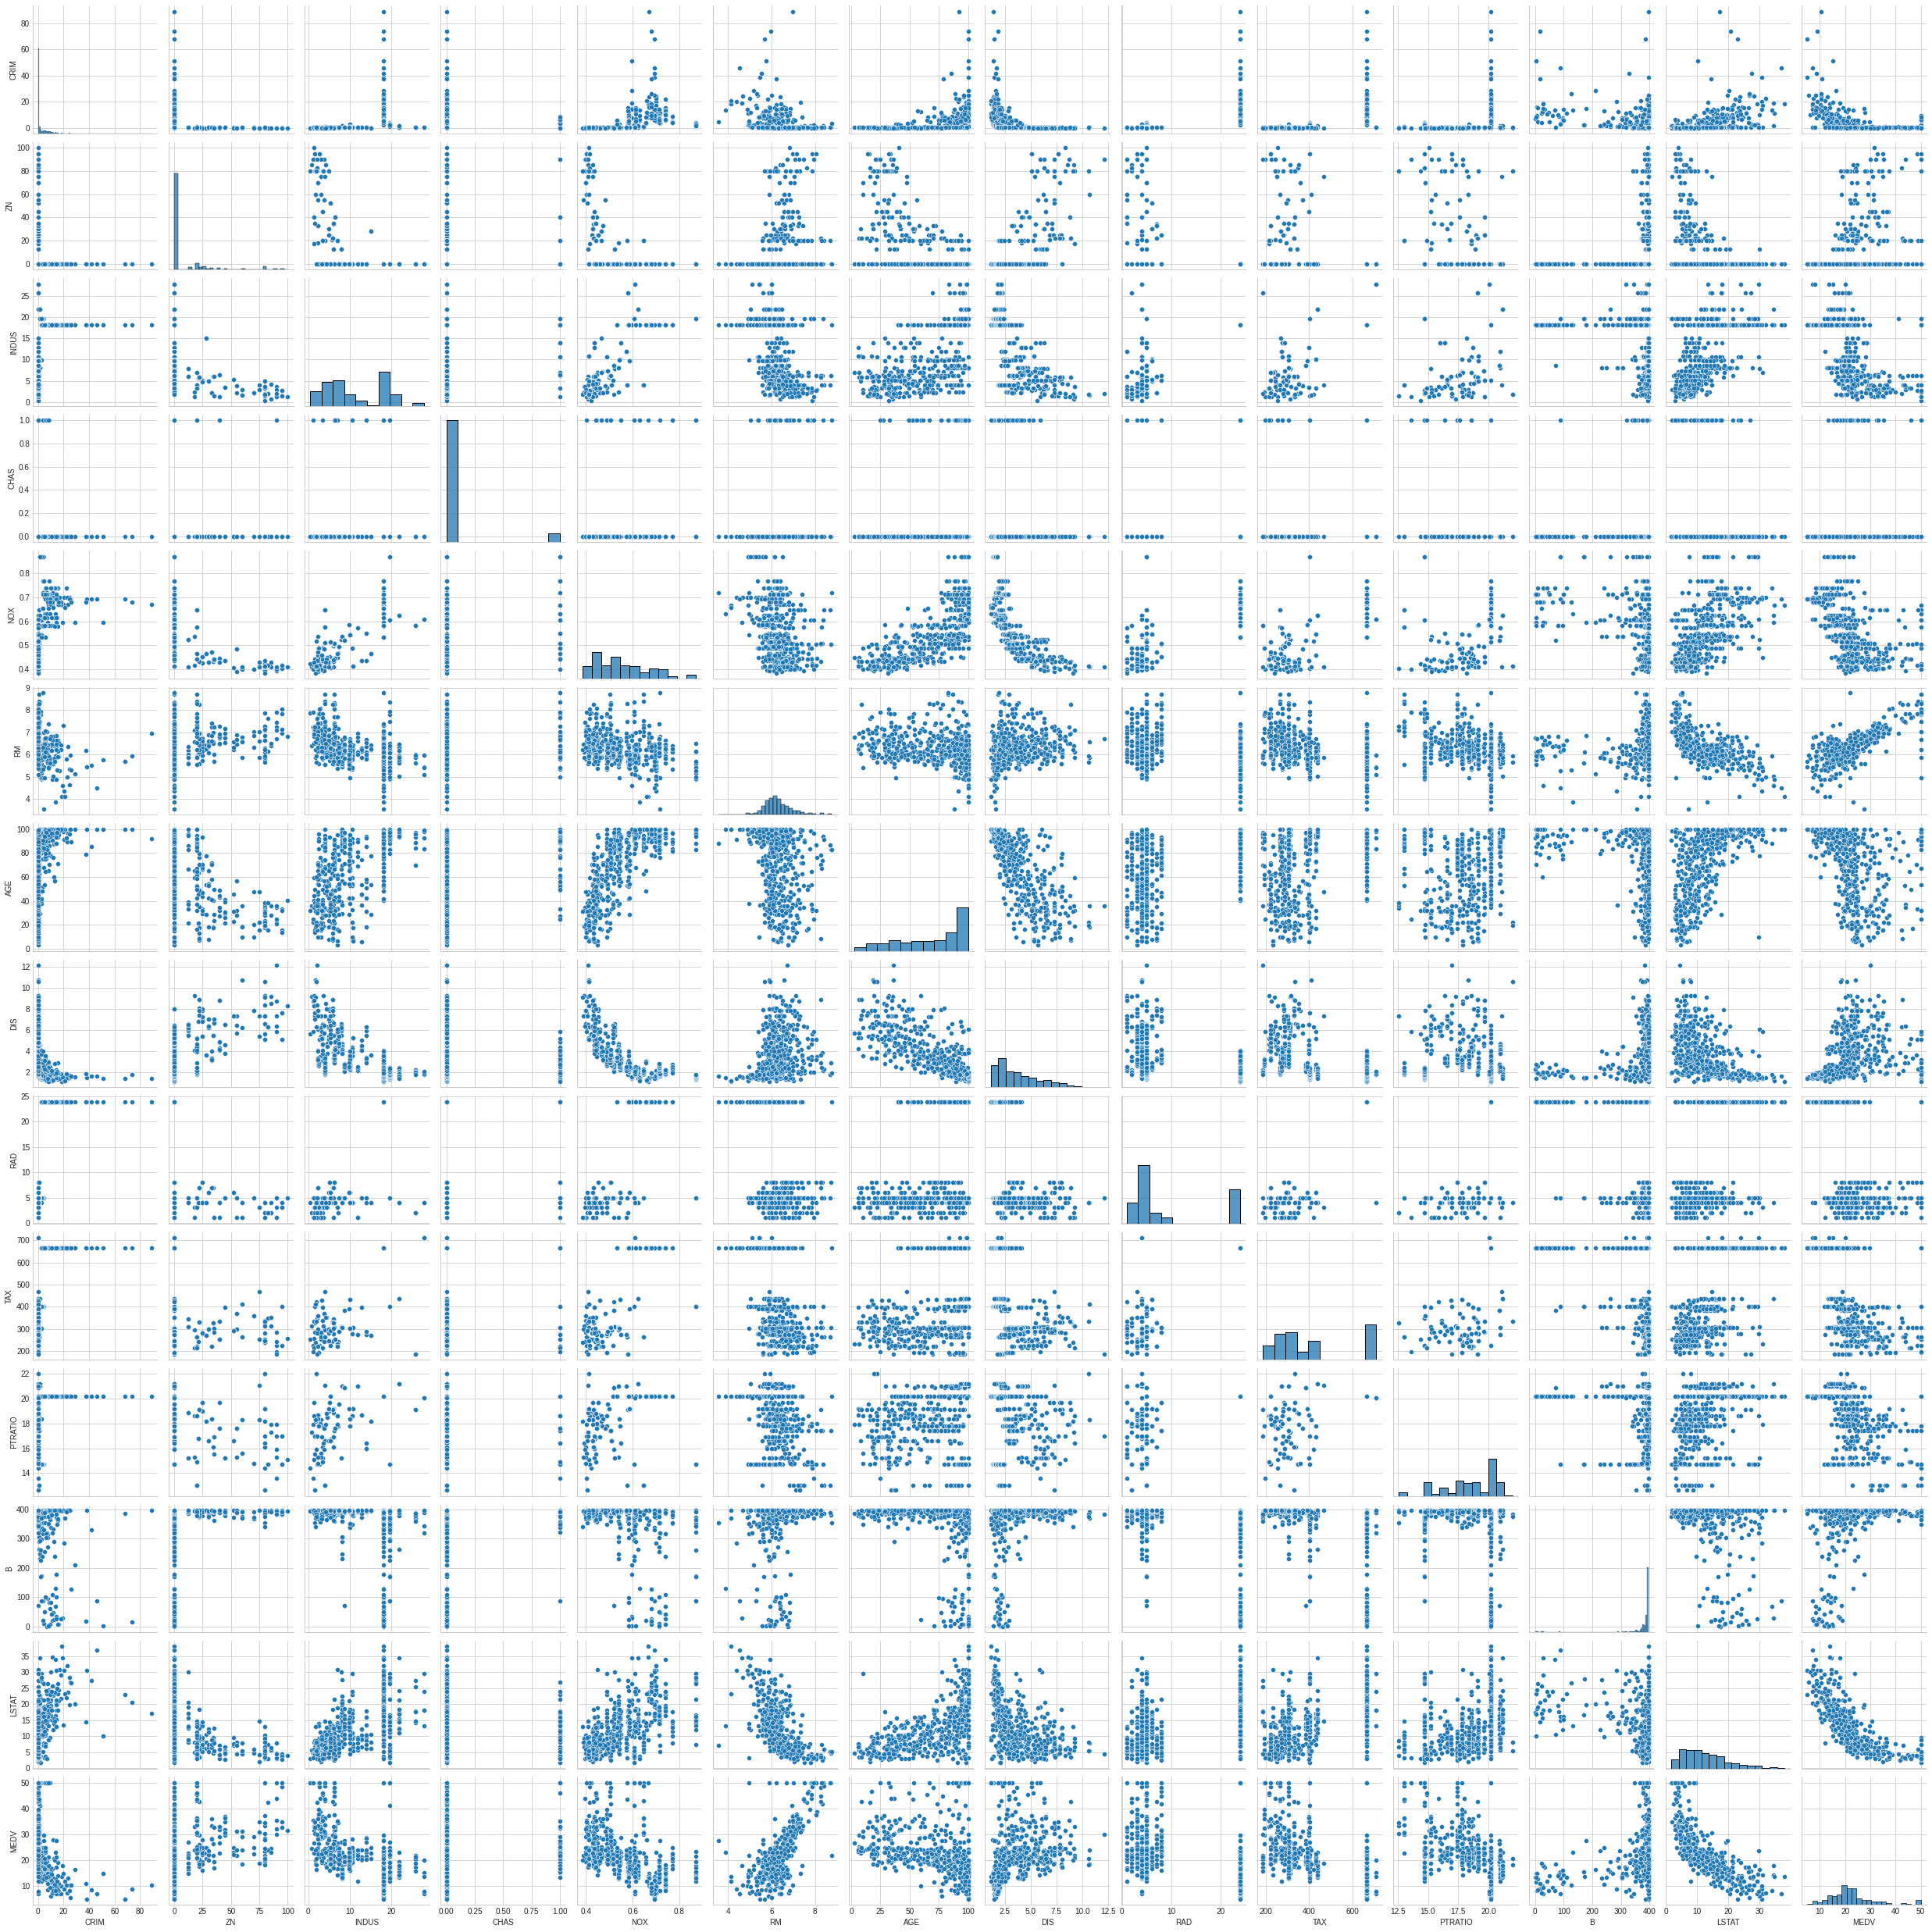

In [29]:
# pairplot을 사용해서 전체 피처 간 상관성을 체크
import seaborn as sns

sns.pairplot(boston_df)

### 보스턴 주택 가격에 대한 선형 회귀

In [30]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(normalize=True)

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2)

model.fit(X_train, y_train)

LinearRegression(normalize=True)

In [32]:
print(f'학습 데이터 점수: {model.score(X_train, y_train)}')
print(f'평가 데이터 점수: {model.score(X_test, y_test)}')

학습 데이터 점수: 0.754695941508809
평가 데이터 점수: 0.6545146984346801


In [33]:
import warnings
warnings.filterwarnings('ignore')

* 데이터를 두개로 분리하고 모델을 생성 및 검증하였지만, 데이터를 분리하였기 때문에 훈련에 사용할 수 있는 양도 작아지고, 분리가 잘 안된 경우에는 잘못된 검증이 될 수 있음
* 이럴 경우에는 테스트셋을 여러개로 구성하여 교차 검증을 진행
* `cross_val_score()` 함수는 교차 검증을 수행하여 모델을 검증
* 다음 예제에서는 모델 오류를 측정하는 점수로 NMSE(Negative Mean Squared Error)를 사용

In [34]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, boston.data, boston.target, 
                         cv=10, scoring='neg_mean_squared_error')
print('NMSE scores: {}'.format(scores))
print('NMSe scores: mean: {}'.format(scores.mean))
print('NMSe scores: std: {}'.format(scores.std))

NMSE scores: [  -9.28694671  -14.15128316  -14.07360615  -35.20692433  -31.88511666
  -19.83587796   -9.94726918 -168.37537954  -33.32974507  -10.96041068]
NMSe scores: mean: <built-in method mean of numpy.ndarray object at 0x7f02604d5510>
NMSe scores: std: <built-in method std of numpy.ndarray object at 0x7f02604d5510>


* 회귀모델의 검증을 위한 또 다른 측정 지표 중 하나로 결정 계수(coefficient of determination, $R^2$) 사용

In [35]:
r2_scores = cross_val_score(model, boston.data, boston.target, cv=10, scoring='r2')

print('R2 scores: {}'.format(r2_scores))
print('R2 scores mean: {}'.format(r2_scores.mean()))
print('R2 scroes std: {}'.format(r2_scores.std()))

R2 scores: [ 0.73376082  0.4730725  -1.00631454  0.64113984  0.54766046  0.73640292
  0.37828386 -0.12922703 -0.76843243  0.4189435 ]
R2 scores mean: 0.20252899006056416
R2 scroes std: 0.5952960169512276


생성된 회귀 모델에 대해서 평가를 위해 LinearRegression 객체에 포함된 두 개의 속성 값을 통해 수식을 표현
* intercept_: 추정된 상수항
* coef_: 추정된 가중치 벡터

In [36]:
print('y = ' + str(model.intercept_) + ' ')
for i, c in enumerate(model.coef_):
    print(str(c)+' * x' + str(i))

y = 34.76978524811447 
-0.11190143645690265 * x0
0.0449065504914788 * x1
-0.01545010569374404 * x2
2.2423109595466797 * x3
-16.528067751242087 * x4
3.934185320694629 * x5
0.00023280142812276422 * x6
-1.491534353966238 * x7
0.32303231805112637 * x8
-0.012417629688117694 * x9
-0.9514943715676774 * x10
0.011232366317297942 * x11
-0.5332053467647545 * x12


In [37]:
from sklearn.metrics import mean_squared_error, r2_score

predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, predict)))
r2 = r2_score(y_train, predict)

print('RMSE: {}'.format(rmse))
print('R2 Score: {}'.format(r2))

RMSE: 4.691481207767133
R2 Score: 0.754695941508809


In [39]:
from sklearn.metrics import mean_squared_error, r2_score

y_test_predict = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print('RMSE: {}'.format(rmse))
print('R2 Score: {}'.format(r2))

RMSE: 4.679368172644827
R2 Score: 0.6545146984346801


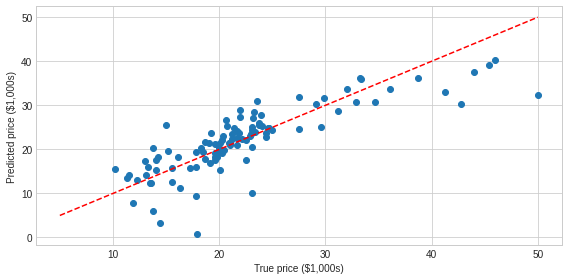

In [41]:
def plot_boston_prices(expected, predicted):
    plt.figure(figsize=(8,4))
    plt.scatter(expected, predicted)
    plt.plot([5, 50], [5, 50], '--r') # describe로 최대'최소값 range 확인
    plt.xlabel('True price ($1,000s)')
    plt.ylabel('Predicted price ($1,000s)')
    plt.tight_layout()

predicted = model.predict(X_test)
expected = y_test

plot_boston_prices(expected, predicted)

## 릿지 회귀(Ridge Regression)

* 릿지 회귀는 선형 회귀를 개선한 선형 모델
* 릿지 회귀는 선형 회귀와 비슷하지만, 가중치의 절대값을 최대한 작게 만든다는 것이 다름
* 이러한 방법은 각각의 특성(feature)이 출력 값에 주는 영향을 최소한으로 만들도록 규제(regularization)를 거는 것
* 규제를 사용하면 다중공선성(multicollinearity) 문제를 방지하기 때문에 모델의 과대적합을 막을 수 있게 됨
* 다중공선성 문제는 두 특성이 일치에 가까울 정도로 관련성(상관관계)이 높을 경우 발생
* 릿지 회귀는 다음과 같은 함수를 최소화 하는 파라미터 $w$를 찾음

\begin{equation}
RidgeMSE = \frac{1}{N} \sum_{i=1}^{N}(y_i - \hat{y}_i)^2 + \alpha \sum_{i=1}^{p} w_i^2
\end{equation}

  + $\alpha$: 사용자가 지정하는 매개변수
  * $\alpha$가 크면 규제의 효과가 커지고, $\alpha$가 작으면 규제의 효과가 작아짐

### 보스턴 주택 가격에 대한 릿지 회귀

In [42]:
from sklearn.linear_model import Ridge
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [44]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [45]:
model = Ridge(alpha=0.1)
model.fit(X_train, y_train)

Ridge(alpha=0.1)

In [46]:
print(f'학습 데이터 점수: {model.score(X_train, y_train)}')
print(f'평가 데이터 점수: {model.score(X_test, y_test)}')

학습 데이터 점수: 0.7207899295951786
평가 데이터 점수: 0.7932648196335153


* 릿지 회귀는 가중치에 제약을 두기 때문에 선형 회귀 모델보다 훈련 데이터 점수가 낮을 수 있음

> 들여쓴 블록


* 일반화 성능은 릿지 회귀가 더 높기 때문에 평가 데이터 점수는 릿지 회귀가 더 좋음

* 일반화 성능에 영향을 주는 매개 변수인 $\alpha$ 값을 조정해 보면서 릿지 회귀 분석의 성능이 어떻게 변하는지 확인 필요

## 라쏘 회귀(Lasso Regression)

* 선형 회귀에 규제를 적용한 또 다른 모델로 라쏘 회귀가 있음
* 라쏘 회귀는 릿지 회귀와 비슷하게 가중치를 0에 가깝게 만들지만, 조금 다른 방식을 사용

* 라쏘 회귀에서는 다음과 같은 함수를 최소화 하는 파라미터 $w$를 찾음

\begin{equation}
LassoMSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 + \alpha \sum_{i=1}^{p} |w_i|
\end{equation}

* 라쏘 회귀도 매개변수인 $\alpha$ 값을 통해 규제의 강도 조절 가능

### 보스턴 주택 가격에 대한 라쏘 회귀

In [47]:
from sklearn.linear_model import Lasso

In [37]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [48]:
model = Lasso(alpha=0.001)
model.fit(X_train, y_train)

Lasso(alpha=0.001)

In [49]:
print(f'학습 데이터 점수: {model.score(X_train, y_train)}')
print(f'평가 데이터 점수: {model.score(X_test, y_test)}')

학습 데이터 점수: 0.7208627049972567
평가 데이터 점수: 0.7928948822761269


## 신축망 (Elastic-Net)

* 신축망은 릿지 회귀와 라쏘 회귀, 두 모델의 모든 규제를 사용하는 선형 모델
* 두 모델의 장점을 모두 갖고 있기 때문에 좋은 성능을 보임
* 데이터 특성이 많거나 서로 상관 관계가 높은 특성이 존재 할 때 위의 두 모델보다 좋은 성능을 보여 줌

* 신축망은 다음과 같은 함수를 최소화 하는 파라미터 $w$를 찾음

\begin{equation}
ElasticMSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i) + \alpha \rho \sum_{i=1}^{p} |w_i| + \alpha (1 - \rho) \sum_{i=1}^{p} w_i^2
\end{equation}

  + $\alpha$: 규제의 강도를 조절하는 매개변수
  + $\rho$: 라쏘 규제와 릿지 규제 사이의 가중치를 조절하는 매개변수

### 보스턴 주택 가격에 대한 신축망

In [50]:
from sklearn.linear_model import ElasticNet

In [51]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [52]:
model = ElasticNet(alpha=0.01)
model.fit(X_train, y_train)

ElasticNet(alpha=0.01)

In [54]:
print(f'학습 데이터 점수: {model.score(X_train, y_train)}')
print(f'평가 데이터 점수: {model.score(X_test, y_test)}')

학습 데이터 점수: 0.7553331059879393
평가 데이터 점수: 0.6525427169834399


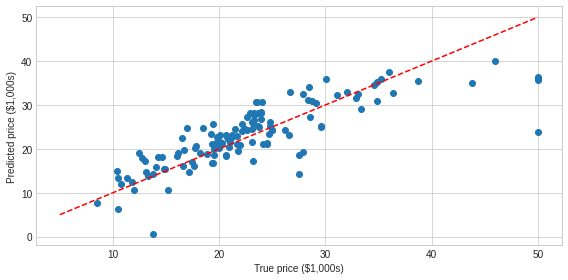

In [55]:
predicted = model.predict(X_test)
expected = y_test

plot_boston_prices(expected, predicted)

## 직교 정합 추구 (Orthogonal Matching Pursuit)

* 직교 정합 추구 방법은 모델에 존재하는 가중치 벡터에 특별한 제약을 거는 방법

* 직교 정합 추구 방법은 다음을 만족하는 파라미터 $w$를 찾는것이 목표

\begin{equation}
\underset{w}{\arg \min} \; ||y - \hat{y}||^2_2 \; subject \; to \; ||w||_0 \leq k
\end{equation}

  + $||w||_0$: 가중치 벡터 $w$에서 0이 아닌 값의 개수

* 직교 정합 추구 방법은 가중치 벡터 $w$에서 0이 아닌 값이 $k$개 이하가 되도록 훈련됨
* 이러한 방법은 모델이 필요 없는 데이터 특성을 훈련 과정에서 자동으로 제거 하도록 만들 수 있음

### 보스턴 주택 가격에 대한 직교 정합 추구

In [56]:
from sklearn.linear_model import OrthogonalMatchingPursuit

In [57]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [58]:
model = OrthogonalMatchingPursuit(n_nonzero_coefs=7)
model.fit(X_train, y_train)

OrthogonalMatchingPursuit(n_nonzero_coefs=7)

In [59]:
print(f'학습 데이터 점수: {model.score(X_train, y_train)}')
print(f'평가 데이터 점수: {model.score(X_test, y_test)}')

학습 데이터 점수: 0.7015226502929528
평가 데이터 점수: 0.776418326159326


* 직교 정합 추구 방법은 위에서 설명한 제약 조건 대신에 다음 조건을 만족하도록 변경 가능

\begin{equation}
\underset{w}{\arg \min} \; ||w||_0 \; subject \; to \; ||y - \hat{y}||^2_2 \leq tol
\end{equation}

  + $||y - \hat{y}||^2_2$는 $\sum_{i=1}^N (y - \hat{y})^2$와 같은 의미

* 위의 식을 통해서 직교 정합 추구 방법을 $y$와 $\hat{y}$ 사이의 오차 제곱 합을 $tol$ 이하로 하면서 $||w||_0$를 최소로 하는 모델로 대체 가능

## 다항 회귀 (Polynomial Regression)

* 입력 데이터를 비선형 변환 후 사용하는 방법
* 모델 자체는 선형 모델

\begin{equation}
\hat{y} = w_1 x_1 + w_2 x_2 + w_3 x_3 + w_4 x_1^2 + w_5 x_2^2
\end{equation}

* 차수가 높아질수록 더 복잡한 데이터 학습 가능

![polynomial regression](https://scikit-learn.org/stable/_images/sphx_glr_plot_polynomial_interpolation_0011.png)


### 보스턴 주택 가격에 대한 다항 회귀

In [61]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

In [37]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [62]:
model = make_pipeline(
    PolynomialFeatures(degree=2),
    StandardScaler(),
    LinearRegression()
)
model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [63]:
print(f'학습 데이터 점수: {model.score(X_train, y_train)}')
print(f'평가 데이터 점수: {model.score(X_test, y_test)}')

학습 데이터 점수: 0.8490328986864335
평가 데이터 점수: 0.8086044716486391


## 참고문헌

* scikit-learn 사이트: https://scikit-learn.org/
* Jake VanderPlas, "Python Data Science Handbook", O'Reilly
* Sebastian Raschka, Vahid Mirjalili, "Python Machine Learning", Packt
* Giuseppe Bonaccorso, "Machine Learning Algorithm", Packt
* Aurelien Geron, "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems", O'Reilly